# DATA INFORMATION:

Iris Data set contains information about 3 different species of Iris plant, with 50 instances for each of the species.
It contains 4 input attributes for each instance & with the help of these attributes a classification model is developed for 3 species of Iris plant.

Input Features(observatios) 
Sepal Length: continuous; depicts the sepal length of Iris plant in cm. 
Sepal Width: continuous; depicts the sepal width of Iris plant in cm. 
Petal Length: continuous; depicts the petal length of Iris plant in cm.
Petal Width: continuous depicts the petal width of Iris plant in cm.

Output Features(predictor)
class: discrete – *Iris Setosa, Iris Versicolor, Iris Virginica* ; depicts the species of Iris plant.





# DATA AQUISITION

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [13]:
df = pd.read_csv("IRIS.csv")

In [14]:
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [15]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [16]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [17]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [18]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# DATA VISUALISATION

C:\Users\Manish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

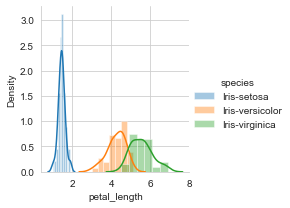

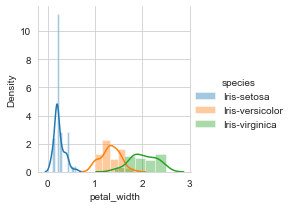

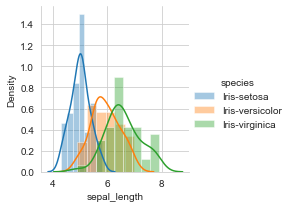

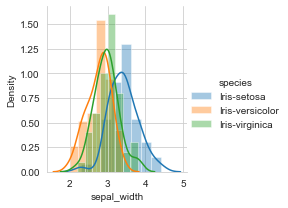

In [19]:
sns.FacetGrid(df,hue="species",height=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(df,hue="species",height=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(df,hue="species",height=3).map(sns.distplot,"sepal_length").add_legend()
sns.FacetGrid(df,hue="species",height=3).map(sns.distplot,"sepal_width").add_legend()


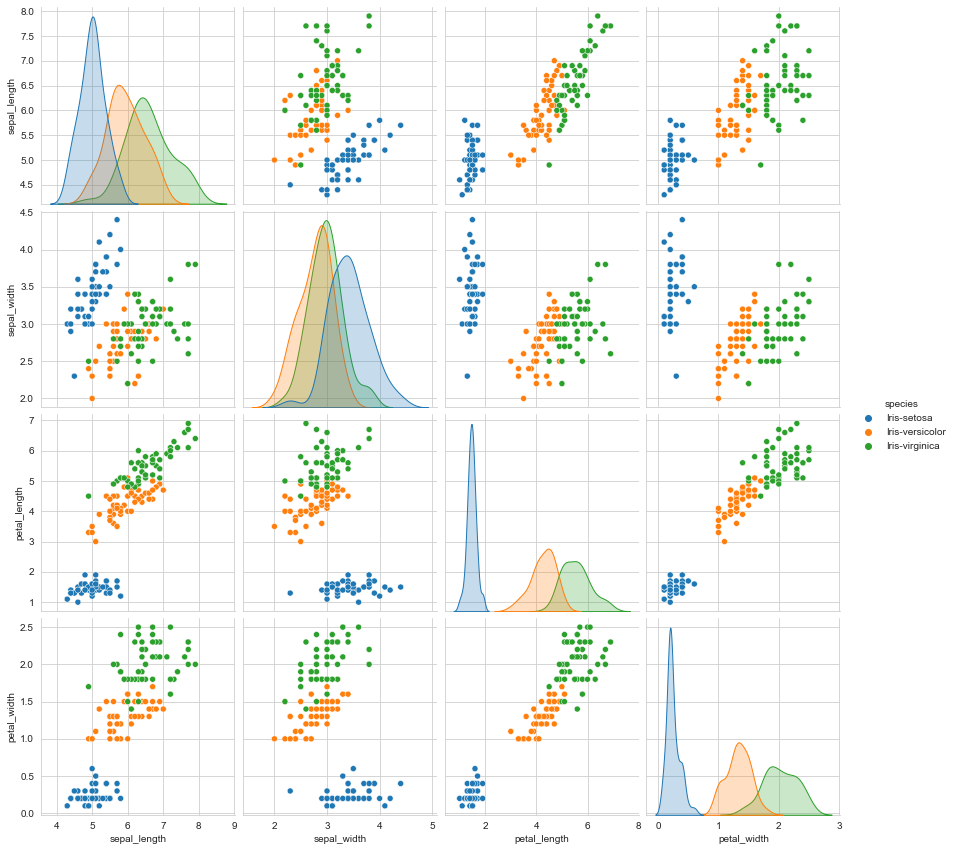

In [20]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",height=3)


In [21]:
df.corr()


sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

In [22]:
df.corr().style.background_gradient(cmap='coolwarm')

# DATA PREPARATION


In [23]:
df['species'].replace(['Iris-versicolor', 'Iris-virginica','Iris-setosa'],[0, 1,2], inplace=True)

In [24]:
df

sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        2
1             4.9          3.0           1.4          0.2        2
2             4.7          3.2           1.3          0.2        2
3             4.6          3.1           1.5          0.2        2
4             5.0          3.6           1.4          0.2        2
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        1
146           6.3          2.5           5.0          1.9        1
147           6.5          3.0           5.2          2.0        1
148           6.2          3.4           5.4          2.3        1
149           5.9          3.0           5.1          1.8        1

[150 rows x 5 columns]

In [25]:
x = df.drop('species', axis=1)
y= df.species
print(x.shape)
print(y.shape)

(150, 4)
(150,)


# Dividing the dataset into Training data set and Testing Data set 


In [26]:
#Main test and Testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


# Data Classification using K-Nearest Neighbour



In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn import metrics

In [31]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print((metrics.accuracy_score(y_test, y_pred))*100)

100.0


In [29]:
print('The accuracy of the knn classifier is {:.2f} on training data'.format((knn.score(x_train, y_train)*100)))
print('The accuracy of the knn classifier is {:.2f} on test data'.format((knn.score(x_test, y_test)*100)))

The accuracy of the knn classifier is 98.33 on training data
The accuracy of the knn classifier is 96.67 on test data


# Data Classification using Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [50]:
logreg = LogisticRegression()
logreg.fit(x, y)
print((metrics.accuracy_score(y_test, y_pred)*100))


96.66666666666667


In [48]:
print('The accuracy of the LogisticRegression classifier is {:.2f} on training data'.format((logreg.score(x_train, y_train)*100)))
print('The accuracy of the LogisticRegression classifier is {:.2f} on test data'.format((logreg.score(x_test, y_test)*100)))

The accuracy of the LogisticRegression classifier is 97.50 on training data
The accuracy of the LogisticRegression classifier is 96.67 on test data


# Data Classification using Support Vector Machine

In [52]:
from sklearn.svm import SVC

In [56]:
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train, y_train)
print((metrics.accuracy_score(y_test, y_pred)*100))


96.66666666666667


In [54]:
print('The accuracy of the LogisticRegression classifier is {:.2f} on training data'.format((svm.score(x_train, y_train)*100)))
print('The accuracy of the LogisticRegression classifier is {:.2f} on test data'.format((svm.score(x_test, y_test)*100)))

The accuracy of the LogisticRegression classifier is 98.33 on training data
The accuracy of the LogisticRegression classifier is 96.67 on test data


# Data Classification using Random Forest


In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rfc = RandomForestClassifier()
rfc.fit(x, y)
print((metrics.accuracy_score(y_test, y_pred)*100))

96.66666666666667


In [33]:
print('The accuracy of the LogisticRegression classifier is {:.2f} on training data'.format(rfc.score(x_train, y_train)))
print('The accuracy of the LogisticRegression classifier is {:.2f} on test data'.format(rfc.score(x_test, y_test)))

The accuracy of the LogisticRegression classifier is 1.00 on training data
The accuracy of the LogisticRegression classifier is 1.00 on test data


*Models were trained on the training data (80%), and their performance was evaluated using testing data (20%). Approx. accuracy of 97% showed that all of the trained models were able to classify the iris plant species correctly.

# THANK YOU